## Análisis exploratorio de datos

### Inicialización

Importamos las librerías.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.stats import levene
from scipy import stats as st

### Tabla 'company'

In [3]:
company = pd.read_csv('/datasets/project_sql_result_01.csv')

La tabla 'company' nos muestra la cantidad de viajes realizado por cada empresa de taxis. Contiene dos columnas:

- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [4]:
company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### Tabla 'trips'

In [6]:
trips = pd.read_csv('/datasets/project_sql_result_04.csv')

La tabla 'trips' nos muestra el promedio de viajes realizados por destino. Contiene dos columnas:
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [7]:
trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Las tablas 'company' y 'trips' no poseen datos ausentes y los tipos de datos son los adecuados para el análisis. No será necesario realizar un preprocesamiento de datos.


Identificamos los 10 principales barrios en términos de finalización.

In [9]:
trips.sort_values('average_trips',ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Realizamos un gráfico de barras de los números de viajes por empresa de taxis.

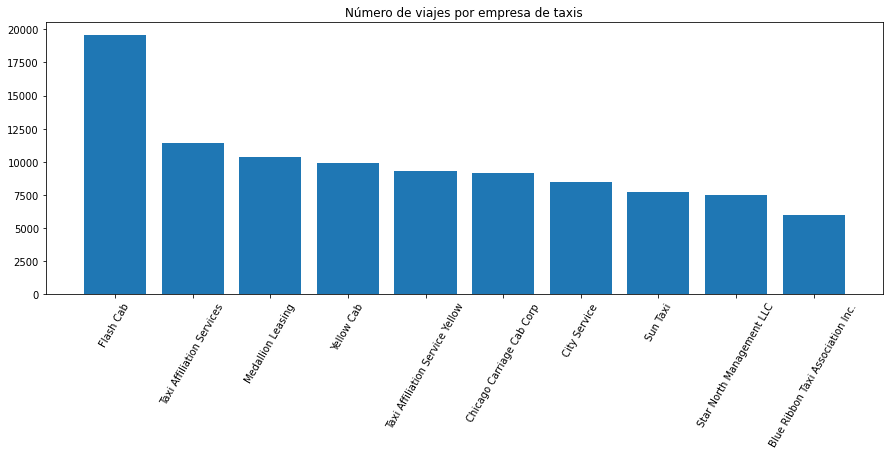

In [37]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.xticks(rotation=60)
plt.title("Número de viajes por empresa de taxis")

plt.bar(company.sort_values('trips_amount',ascending=False).head(10)['company_name'], company.sort_values('trips_amount',ascending=False).head(10)['trips_amount'])
plt.show()

De las 10 empresas que más viajes realizaron, fue la empresa Flash Cab la que realizó más viajes, teniendo casi el doble que la segunda empresa de la lista. 

Porcentaje de viajes realizados de la empresa Flash Cab:

In [11]:
company.loc[company['company_name']=='Flash Cab','trips_amount']/company['trips_amount'].sum()

0    0.142436
Name: trips_amount, dtype: float64

Realizamos un gráfico de barras que nos muestra los 10 barrios principales por número de viajes finalizados.

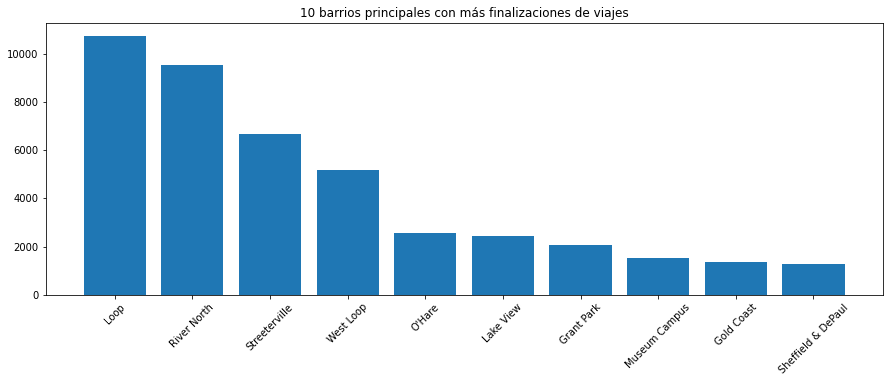

In [38]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.xticks(rotation=45)
plt.title("10 barrios principales con más finalizaciones de viajes")
plt.bar(trips.sort_values('average_trips',ascending=False).head(10)['dropoff_location_name'], trips.sort_values('average_trips',ascending=False).head(10)['average_trips'])
plt.show()

Se observa que los barrios con más finalizaciones de viaje fueron Loop, River North, Streeterville y West Loop, siendo Loop el más frecuentado teniendo 5 veces más finalizaciones que los restantes de los 10 con más finalizaciones de viajes.

Porcentaje del barrio con más finalizaciones de viajes:

In [13]:
trips.loc[trips['dropoff_location_name']=='Loop','average_trips']/trips['average_trips'].sum()

0    0.190218
Name: average_trips, dtype: float64

Porcentaje de los cuatro barrios con más finalizaciones de viajes:

In [14]:
trips.sort_values('average_trips',ascending=False).head(4)['average_trips'].sum()/trips['average_trips'].sum()

0.5688287378682103

### Conclusiones

- La empresa Flash Cab realizó cerca del 15 % de viajes del total de los viajes realizados.
- El barrio más frecuentado fue Loop, el cual representa al 19 % del total de los viajes.
- Los cuatro barrios más frecuentados representan el 56 % del total de los viajes.

## Prueba de hipótesis 

In [15]:
viajes = pd.read_csv('/datasets/project_sql_result_07.csv')

La tabla 'viajes' nos muestra los datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Contiene tres columnas:

- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

In [16]:
viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
viajes.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Es necesario realizar el cambio de tipo de dato a tipo fecha en la columna 'start_ts'. No se encontraron valores ausentes en la tabla.

In [18]:
viajes['start_ts'] = pd.to_datetime(viajes['start_ts'], format='%Y/%m/%d %H:%M:%S')
viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Creamos una nueva columna que nos muestra qué día de la semana se realizó el viaje.

In [19]:
viajes['day']=viajes['start_ts'].dt.dayofweek
viajes['day'].unique()

array([5])

Todos los datos registrados corresponden a días sábados, por lo que solo será necesario filtrar por condición del clima. 

### Hipótesis:  'La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos'

Establecemos como hipótesis nula que 'las medias de las duraciones promedio de viajes son iguales los sábados lluviosos', por lo que la hipótesis alternativa sería que 'las medias de las duraciones promedio de viajes son diferentes los sábados lluviosos'.

In [20]:
duration_viajes=viajes.loc[viajes['weather_conditions']=='Good','duration_seconds']
duration_viajes

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [21]:
duration_lluviosos=viajes.loc[viajes['weather_conditions']=='Bad','duration_seconds']
duration_lluviosos

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

Aplicamos la prueba de Levene para determinar el valor de equal_var.

In [22]:
stat, p = levene(duration_viajes, duration_lluviosos)
p

0.5332038671974493

Como el p-value es mayor a 0.05 el valor de equal_var será True. Establecemos el nivel crítico de significación estadística: alpha=0.05.

In [23]:
alpha = 0.05

results =st.ttest_ind(duration_viajes,duration_lluviosos,equal_var=True)
print('p-value:',results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.517970327099473e-12
Rechazamos la hipótesis nula


In [24]:
duration_viajes.mean(),duration_lluviosos.mean()

(1999.6756756756756, 2427.2055555555557)

El valor p nos dice que para las cantidades promedio de la duración de los viajes los sábados lluviosos son diferentes, existe una probabilidad muy baja de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es suficiente para rechazar la hipótesis nula y poder concluir que las medias de las dos poblaciones son diferentes (hipótesis alternativa). Concluímos que las medias de la duración de los viajes cambia los sábados lluviosos.

## Conclusiones

- La empresa de taxis más usada es Flash Cab, el cual realiza el 14.2 % del total de los viajes.
- El barrio más frecuentado fue Loop, el cual representa al 19 % del total de los viajes.
- La duración de los viajes los sábados lluviosos es mayor que en los días con buen clima.